In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
shootings = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [5]:
shootings.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,<18,M,WHITE,25-44,M,WHITE HISPANIC,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
1,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,<18,M,WHITE,25-44,M,WHITE HISPANIC,"999,925","214,507",40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
2,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,<18,M,WHITE,18-24,M,BLACK,"999,925","214,507",40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
3,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
4,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,18-24,M,BLACK,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)


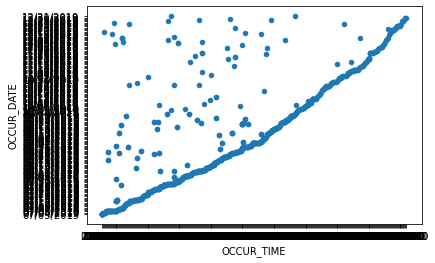

In [6]:
shootings.plot.scatter(x = 'OCCUR_TIME', y = 'OCCUR_DATE')

ValueError: could not convert string to float: '00:04:00'

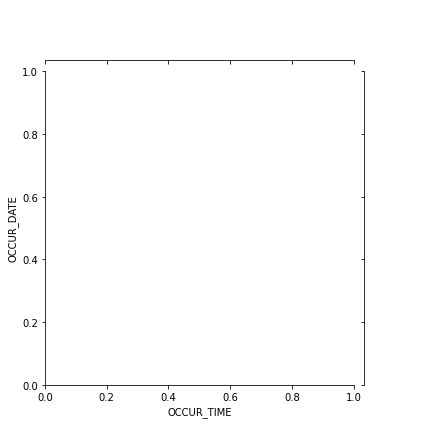

In [9]:
sns.jointplot(x = 'OCCUR_TIME', y = 'OCCUR_DATE', data = shootings, kind = 'kde')

In [10]:
shootings.dtypes

INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
PRECINCT                     int64
JURISDICTION_CODE            int64
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                  object
Y_COORD_CD                  object
Latitude                   float64
Longitude                  float64
Lon_Lat                     object
dtype: object

In [12]:
shootings['OCCUR_DATE'] = pd.to_datetime(shootings['OCCUR_DATE'])

In [13]:
shootings.dtypes

INCIDENT_KEY                        int64
OCCUR_DATE                 datetime64[ns]
OCCUR_TIME                         object
BORO                               object
PRECINCT                            int64
JURISDICTION_CODE                   int64
LOCATION_DESC                      object
STATISTICAL_MURDER_FLAG              bool
PERP_AGE_GROUP                     object
PERP_SEX                           object
PERP_RACE                          object
VIC_AGE_GROUP                      object
VIC_SEX                            object
VIC_RACE                           object
X_COORD_CD                         object
Y_COORD_CD                         object
Latitude                          float64
Longitude                         float64
Lon_Lat                            object
dtype: object

In [15]:
shootings['OCCUR_TIME'] = pd.to_datetime(shootings['OCCUR_TIME'])

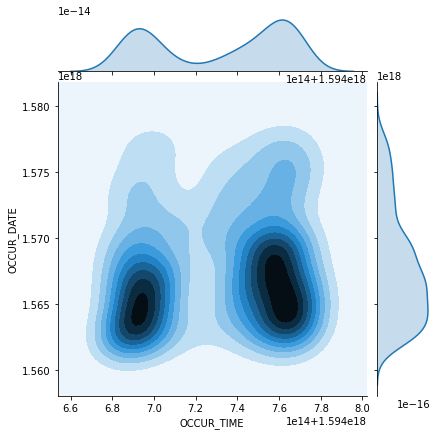

In [16]:
sns.jointplot(x = 'OCCUR_TIME', y = 'OCCUR_DATE', data = shootings, kind = 'kde')

In [17]:
import folium 

In [18]:
m = folium.Map(location = [40.755443, -73.943423], zoom_start = 3)

In [20]:
shootings.tail()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
821,206875589,2019-12-30,2020-07-14 03:17:00,BROOKLYN,81,0,NaN,False,NaN,NaN,NaN,45-64,M,BLACK HISPANIC,1006612,189509,40.686815,-73.919370,POINT (-73.91936988499998 40.68681516500004)
822,206882664,2019-12-30,2020-07-14 21:29:00,BROOKLYN,71,0,NaN,False,25-44,M,BLACK,25-44,M,BLACK,1000996,178614,40.656923,-73.939647,POINT (-73.93964677899999 40.656923240000026)
823,206875589,2019-12-30,2020-07-14 03:17:00,BROOKLYN,81,0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1006612,189509,40.686815,-73.919370,POINT (-73.91936988499998 40.68681516500004)
824,206890929,2019-12-31,2020-07-14 23:15:00,MANHATTAN,28,0,HOTEL/MOTEL,True,25-44,M,BLACK,25-44,M,BLACK,997155,230828,40.800244,-73.953390,POINT (-73.95339008999997 40.80024432600004)
825,206891917,2019-12-31,2020-07-14 20:14:00,BROOKLYN,73,0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1007235,179932,40.660527,-73.917156,POINT (-73.91715616699997 40.66052686300003)


In [22]:
for index, row in shootings.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

In [23]:
m